# Grafo del experimtento.
Primero, importamos las librerías

In [185]:
import math

import networkx as nx
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import pyplot as plt

Leemos la tabla de datos, y la imprimimos

In [186]:
# Use pandas to read the data from the csv file.
df = pd.read_csv('nodos.csv')
# Create a dictionary with the data from the csv file.
data = {'key': df['key'], 'x': df['x'], 'y': df['y'], 'cantidad': df['cantidad'], 'mineral': df['Mineral']}
df

,key,x,y,cantidad,Mineral
0,A,9083,6551,2,Au
1,B,9008,6504,2,Au
2,C,8950,6477,2,Au
3,D,8910,6415,2,Au
4,E,8881,6404,2,Au
5,F,8833,6407,3,Au
6,G,9123,6314,3,Fe
7,H,9162,6310,2,Fe
8,I,9084,6246,3,Fe
9,J,9146,6231,2,Fe


Creamos un grafo con las aristas, y pesos

In [224]:
G = nx.path_graph(0)


def distance(x1, y1, x2, y2):
    '''Calcula la distancia entre dos puntos'''
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


edges = {
    (i, j, distance(x1, y1, x2, y2))
    for i, x1, y1 in zip(data['key'], data['x'], data['y'])
    for j, x2, y2 in zip(data['key'], data['x'], data['y']) if i != j
}

G.add_weighted_edges_from(edges)  # Agrega los vertices a partir de un diccionario de tuplas con la forma (x,y,peso)
nodes = {
    i: (j, k)
    for i, j, k in zip(data['key'], data['x'], data['y'])
}


def to_linked_list(p):
    '''Convierte un conjunto de nodos en tuplas a una reperesentación en listas enlazadas'''
    return {i: sorted([(j, k) for l, j, k in p if i == l]) for i in data['key']}


edges2 = to_linked_list(edges)
#G.add_weighted_edges_from({(x, y, z) for x in edges2.keys() for y, z in edges2[x]}) # -> agrega a partir de una lista enlazada simple

In [229]:
print(edges2['A'])

[('B', 88.50988645343524), ('C', 152.2005256232711), ('D', 220.05681084665386), ('E', 249.8259394058191), ('F', 288.5064990602465), ('G', 240.3518254559345), ('H', 253.6178227175685), ('I', 305.00163933985664), ('J', 326.1426068455331), ('K', 371.7109091753967), ('L', 375.5156454796524), ('M', 367.16345134013545), ('N', 289.58073140317885), ('O', 445.6231591827337), ('P', 428.4903732874287), ('Q', 488.87217143134666), ('R', 577.6088641979103), ('S', 634.5967223363197), ('T', 507.9222381428086)]


Dibujamos el grafo

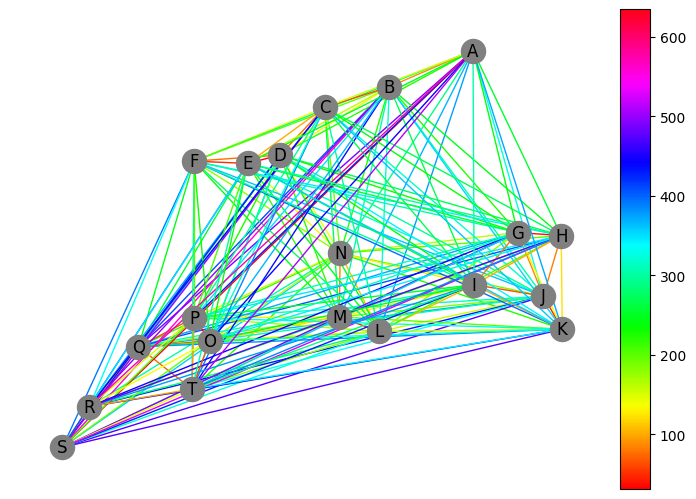

In [228]:
#Creamos el grafo
colormap = plt.cm.hsv
nx.draw(G, nodes, edge_color=[G[u][v]['weight'] for (u, v) in G.edges()],
        edge_cmap=colormap, with_labels=True, node_color="gray")
# Creamos la barra de color
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
pesosw = list([G[u][v]['weight'] for (u, v) in G.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb, cmap=colormap, norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb)

#Mostramos la imagen
plt.show()

In [190]:
print("El arbol completo tiene " + str(len(G.edges)) + " aristas\n")


El arbol completo tiene 190 aristas



In [236]:
print(list(G.neighbors('A')))

['R', 'T', 'D', 'S', 'I', 'B', 'O', 'M', 'P', 'J', 'L', 'H', 'F', 'G', 'E', 'C', 'Q', 'N', 'K']


Copiamos el grafo a otro, y le reducimos el número de aristas, a las aristas con un peso inferior a 200

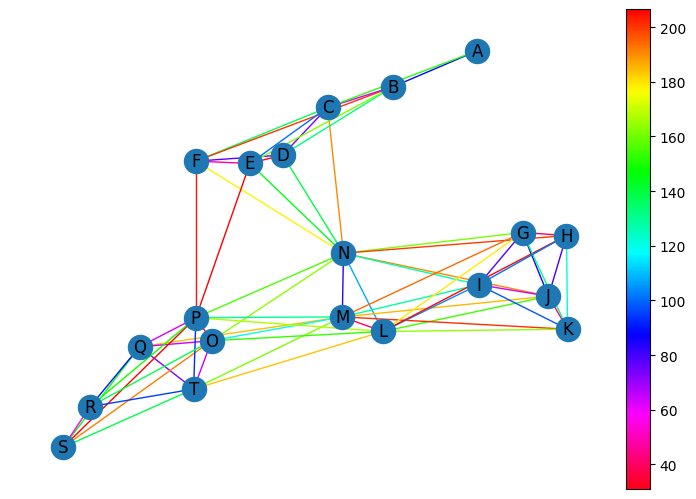

In [382]:
#import random

G2 = G.copy()
max_weight = 210
G2.remove_edges_from(list(filter(lambda item: item[2] > max_weight, edges)))

#G2.remove_edges_from(list(filter(lambda item: len(list(G2.neighbors(item[0]))) > 7 and bool(random.getrandbits(1)), edges)))
nx.draw(G2, nodes,
        edge_color=[G2[u][v]['weight'] for (u, v) in G2.edges()],
        edge_cmap=plt.cm.hsv_r,
        with_labels=True)  # Creamos la barra de color
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="4%", pad=0.05)
pesosw = [G2[u][v]['weight'] for (u, v) in G2.edges()]
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.Colorbar(ax=ax_cb, cmap=plt.cm.hsv_r, norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb)

#Mostramos imagen
plt.show()

Por lo tanto, podemos calcular en número de aritas:

In [192]:
print("El arbol reducido tiene " + str(len(G2.edges)) + " aristas\n")

El arbol reducido tiene 68 aristas



Podemos calcular el árbol mínimo de dispersión

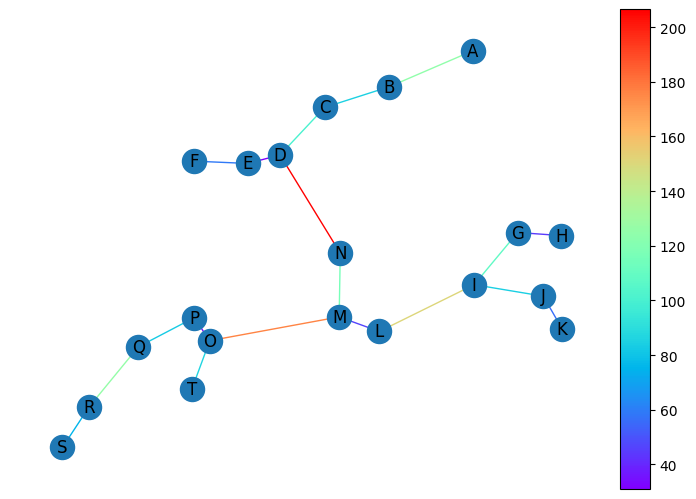

In [193]:
# Create a new graph of the minimum spanning tree of the original graph.
MST = nx.minimum_spanning_tree(G)
# Plot the graph.
nx.draw(MST, nodes, edge_color=[MST[u][v]['weight'] for (u, v) in MST.edges()], edge_cmap=plt.cm.rainbow,
        with_labels=True)
# Creamos la barra de color
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
pesosw = list([G2[u][v]['weight'] for (u, v) in G2.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb, cmap=plt.cm.rainbow, norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb)

# Mostramos imagen
plt.show()
